In [8]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [5]:
path = "./UJIIndoorLoc/children_13/sorted/00_sorted.csv"
train_df = pd.read_csv(path,header=0)
print(train_df.shape)
a = train_df.mean()
print(a["WAP004"])
for i in train_df.columns[:520]:
    if a[i]==-110:
        del train_df[i]
print(train_df.shape)
train_df["REF"] = pd.factorize(train_df["REF"])[0].astype(int)#将标签映射到顺序数字上
labels = train_df.REF.values
features = train_df.drop(columns=['TIMESTAMP','PHONEID','USERID','RELATIVEPOSITION',
                                'SPACEID','BUILDINGID','FLOOR','LATITUDE','LONGITUDE',
                                'BF','REF']).values

(1059, 531)
-110.0
(1059, 130)


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2,
                                                    random_state=150,
                                                    #random_state：可以理解为随机数种子，主要是为了复现结果而设置
                                                    stratify=labels)#保证划分的test中的所有标签齐全
X_train,Y_train = shuffle(X_train, Y_train)

In [43]:
n_digits = 54
ks = list(range(1, 9))
scores = []
scores_kmeans = []
ks

[1, 2, 3, 4, 5, 6, 7, 8]

In [44]:
for k in ks:
    # naive
    x_train_k, _, y_train_k, _ = train_test_split(X_train, Y_train, train_size=n_digits * k, stratify=Y_train, random_state=42)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(x_train_k, y_train_k)
    scores.append(neigh.score(X_test, Y_test))
    # k-means
    x_train_kmeans = []
    y_train_kmeans = []
    for i in range(n_digits):
        x_train_kmeans.append(KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_train[Y_train == i]).cluster_centers_)
        y_train_kmeans.extend([i] * k)
    x_train_kmeans = np.concatenate(x_train_kmeans)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(x_train_kmeans, y_train_kmeans)
    scores_kmeans.append(neigh.score(X_test, Y_test))

C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: User

C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\xfp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: User

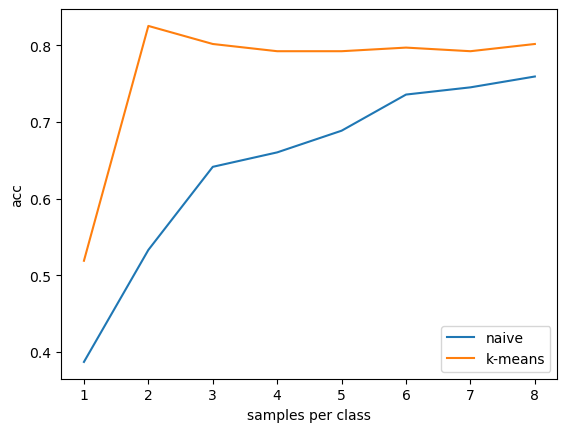

In [46]:
plt.plot(ks, scores, label='naive')
plt.plot(ks, scores_kmeans, label='k-means')
plt.ylabel('acc')
plt.xlabel('samples per class')
plt.legend()

In [51]:
x_train_kmeans,x_train_kmeans.shape,y_train_kmeans

(array([[-110.        , -110.        , -110.        , ..., -110.        ,
         -110.        , -110.        ],
        [-110.        , -110.        , -110.        , ..., -110.        ,
         -110.        , -110.        ],
        [-110.        , -110.        , -110.        , ..., -110.        ,
         -110.        , -110.        ],
        ...,
        [ -84.66666667, -110.        , -110.        , ..., -110.        ,
         -110.        , -110.        ],
        [ -85.        , -110.        , -110.        , ..., -110.        ,
         -110.        , -110.        ],
        [ -85.        , -110.        , -110.        , ..., -110.        ,
         -110.        , -110.        ]]),
 (432, 119),
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7